In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_933.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_121.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_802.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_777.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_743.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_273.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_612.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_635.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_691.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_894.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_140.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_716.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_493.json
/kaggle/input/dataset-yaml3/Annotation_rectangle/Post_Event_729.json
/kaggle/input/dataset-yaml3/Annota

In [4]:
# ### Run this cell only once.
%pip install ultralytics
# # !pip install opencv-python-headless
# # !pip install labelme2yolo

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os


In [6]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
#from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Model Building
import ultralytics
from ultralytics import YOLO
#import labelme2yolo

# Others
import os
import shutil
import zipfile

**Preparing the File Structure as required by YOLO**

In [7]:
model2 = YOLO('yolov9e.pt')
model2.info()

100%|██████████| 112M/112M [00:00<00:00, 254MB/s]  


YOLOv9e summary: 1225 layers, 58206592 parameters, 0 gradients, 193.0 GFLOPs


(1225, 58206592, 0, 193.01565439999996)

In [9]:
model1 = YOLO('yolov9c.pt')
model1.info()

100%|██████████| 49.4M/49.4M [00:00<00:00, 237MB/s]


YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs


(618, 25590912, 0, 104.02268160000003)

In [10]:
model = YOLO('yolov9e.pt')
model.info()

YOLOv9e summary: 1225 layers, 58206592 parameters, 0 gradients, 193.0 GFLOPs


(1225, 58206592, 0, 193.01565439999996)

In [8]:
yml_path = "/kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/dataset.yaml"

In [12]:
yml_path_rest = "/kaggle/input/dataset-yaml4/Annotations_rest/YOLODataset/dataset.yaml"

In [9]:
os.environ["WANDB_DISABLED"] = "False"

results = model2.train(data= yml_path,augment=True,
                      epochs=100,
                      imgsz=512)

Ultralytics YOLOv8.2.14 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=/kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]
2024-05-13 17:01:51,399	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-13 17:01:52,168	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-13 17:01:54.235724: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 17:01:54.235833: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 17:01:54.362282: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1         0  ultralytics.nn.modules.block.Silence         []                            
  1                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  2                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  3                  -1  1    252160  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 2]        
  4                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  5                  -1  1   1004032  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 2]       
  6                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  7                  -1  1   4006912  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.42.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 75.1MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels/train... 132 images, 0 backgrounds, 0 corrupt: 100%|██████████| 132/132 [00:00<00:00, 227.67it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels/val... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 196.81it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      14.9G      1.857      4.401      1.593         38        512: 100%|██████████| 9/9 [00:14<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

                   all         33        245      0.385      0.265      0.148     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      14.5G       1.46       2.18      1.267         39        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         33        245     0.0536      0.441     0.0471     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.7G      1.361      1.713       1.22         46        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         33        245    0.00423     0.0024    0.00186   0.000372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      14.5G      1.403      1.681      1.278         31        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245    0.00423     0.0024    0.00186   0.000372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.9G      1.422        1.6      1.217         65        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         33        245    0.00423     0.0024    0.00186   0.000372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      14.6G      1.429      1.592      1.243         55        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         33        245   0.000428    0.00481   0.000222   7.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      14.6G      1.376      1.532      1.254         46        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         33        245     0.0199      0.619     0.0179     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.6G      1.411      1.728      1.273         23        512: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         33        245    0.00342      0.157    0.00281    0.00129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.6G      1.377      1.688      1.246         50        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         33        245    0.00302     0.0211    0.00145   0.000658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      14.6G      1.483      1.519      1.261         54        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245     0.0161      0.185    0.00977    0.00559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.9G      1.435      1.517      1.243         47        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245     0.0373      0.173     0.0179     0.0087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        14G      1.354      1.481      1.224         54        512: 100%|██████████| 9/9 [00:09<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all         33        245   0.000164    0.00481    8.6e-05   1.27e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.5G      1.356      1.495      1.238         32        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         33        245   0.000341     0.0104   0.000176   5.31e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.9G      1.351      1.529       1.22         61        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         33        245   0.000147    0.00481   7.53e-05   3.01e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        14G      1.316      1.344      1.192         42        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         33        245     0.0184     0.0502     0.0113    0.00464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        14G      1.338      1.353      1.214         32        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         33        245       0.11       0.33      0.112      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.7G      1.346      1.411      1.216         45        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.175        0.4      0.154      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        14G      1.309      1.378      1.189         63        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.141      0.461      0.132     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        14G      1.285      1.337       1.16         56        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.176      0.507      0.217      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        14G      1.286      1.345      1.162         79        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.239      0.421      0.196      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.5G      1.281      1.346      1.148         52        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.213      0.494      0.194      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        14G      1.282      1.374      1.192         26        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.177      0.364      0.137     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.8G      1.256      1.372      1.151         56        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         33        245      0.134      0.396     0.0881     0.0477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        14G      1.225      1.311      1.162         48        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245        0.1      0.119     0.0392     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.5G       1.27      1.307      1.176         41        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.235      0.248      0.178      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.9G      1.229      1.255      1.129         57        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.213      0.419      0.274      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.8G      1.285      1.311      1.182         48        512: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245       0.27      0.351      0.251       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.9G      1.241       1.26      1.158         77        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         33        245      0.242      0.399      0.236      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.7G      1.283      1.195      1.192         48        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.324       0.45      0.345      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      14.7G      1.241      1.197      1.192         45        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.275      0.528      0.337      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100        14G      1.176      1.229      1.153         63        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         33        245      0.206      0.522      0.268       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.9G      1.191       1.19      1.147         39        512: 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         33        245      0.309      0.452      0.344      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.5G        1.2       1.22       1.13         42        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245       0.16      0.451      0.197      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.7G      1.151      1.156      1.131         56        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.344      0.563      0.354      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        14G      1.132      1.133      1.098         66        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.363      0.491        0.4      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        14G      1.157      1.127      1.118         38        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245       0.39      0.451      0.384      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      14.5G       1.14      1.132      1.132         35        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.366      0.564      0.391       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        14G      1.101      1.035      1.113         40        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.332      0.551       0.37      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.8G      1.098      1.028      1.098         44        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.346      0.439      0.338      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        14G      1.108      1.069      1.131         45        512: 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.355      0.486      0.364      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.5G      1.153      1.076      1.123         85        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.323      0.487      0.354       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        14G       1.13       1.07      1.089         64        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.333      0.565       0.38      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        14G      1.114      1.067      1.128         20        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.316      0.464      0.338      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        14G      1.089     0.9826      1.096         31        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.369      0.454      0.407      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.7G      1.084      1.015      1.091         39        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.341      0.531      0.409      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.9G      1.039      1.003      1.064         22        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.292      0.461      0.338      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.8G      1.075      1.023      1.084         39        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         33        245      0.342      0.465      0.388      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        14G      1.034     0.9598      1.048         38        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.362      0.533      0.394      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      14.5G      1.046     0.9276      1.081         43        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.377      0.449      0.378      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.9G      1.099     0.9492      1.077         38        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.322      0.504      0.363      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        14G      1.067     0.8881      1.083         24        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.367      0.487      0.403      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        14G     0.9872     0.8547      1.038         35        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245       0.31      0.548       0.38       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.7G       1.04     0.8607      1.059         51        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245        0.4      0.441      0.404      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      13.9G      1.084     0.9187      1.112         19        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.311      0.539      0.386      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100        14G     0.9791     0.8194      1.022         25        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.379      0.496      0.377      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100        14G     0.9727     0.7954      1.012        103        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.354      0.515       0.38      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      13.7G      0.981     0.7831      1.027         20        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.348      0.519      0.397       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      13.9G     0.9574     0.7815      1.033         18        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.366      0.483      0.384      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        14G     0.9538      0.755      1.029         38        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.377      0.483      0.404      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.9G     0.9195      0.736      1.007         41        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.393        0.5      0.405      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      14.5G     0.9297     0.7204      1.046         47        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.358      0.477      0.386      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      13.9G     0.9242     0.7033      1.005         44        512: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.408      0.386      0.347      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        14G     0.9143     0.6605      1.004         48        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.309      0.573      0.373       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.9G     0.9084     0.7118      1.003         67        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245       0.35      0.488       0.37       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.7G     0.9231     0.6658      1.018         47        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.371       0.48      0.376      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        14G     0.9152     0.6984       1.01         44        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.395       0.39      0.361      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100        14G     0.9089     0.6841      1.016         80        512: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         33        245       0.45      0.383      0.389       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        14G     0.9048     0.7004      1.009         25        512: 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245       0.35      0.455      0.375      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.5G     0.9321     0.7206      1.024         48        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.409      0.401      0.379      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        14G     0.8971     0.6668      1.016         44        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245        0.4      0.357      0.355      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.8G     0.8532     0.6463     0.9838         57        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.308      0.533      0.367      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100        14G      0.869     0.5994      1.006         27        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.357      0.434      0.371      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      14.5G     0.8523     0.6183     0.9992         25        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.339       0.41      0.368      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      14.8G     0.8564     0.5834      1.005         29        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.339      0.428      0.364      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100        14G     0.8601     0.5852     0.9836         78        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         33        245      0.319      0.498      0.353      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      13.9G     0.8431      0.552     0.9761         49        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.352      0.481      0.374      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      14.5G     0.8431     0.5675     0.9907         54        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245       0.37      0.462      0.374      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        14G     0.8292     0.5496     0.9775         37        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.361      0.473      0.366      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        14G      0.805     0.5273     0.9678         29        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.523      0.353      0.375      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        14G     0.8089     0.5345     0.9756         71        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.424      0.414      0.393       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      14.5G     0.8033     0.5163     0.9816         46        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.329      0.487      0.382      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        14G     0.7744     0.4958     0.9573         59        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.321      0.442      0.383       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      14.8G     0.8431     0.5608     0.9643         70        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         33        245       0.33      0.477      0.384      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      13.9G     0.8156     0.5056      0.961         56        512: 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.459      0.349       0.37      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      14.5G     0.7834     0.4913     0.9764         41        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245       0.44      0.371      0.372      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      14.7G     0.7865     0.4854     0.9597         25        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.354      0.455      0.384      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        14G     0.7587     0.5265     0.9613         43        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.426      0.427      0.391      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      13.9G     0.7539     0.4651     0.9608         48        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245       0.39       0.42      0.387      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      14.5G     0.7277     0.4557     0.9329         64        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245       0.34      0.496      0.375       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      13.9G     0.7191     0.4698     0.9359         50        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.329      0.494      0.374      0.229


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        14G     0.7071     0.4499     0.9518         25        512: 100%|██████████| 9/9 [00:10<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.314        0.5      0.374      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        14G     0.7211     0.4393     0.9454         30        512: 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.327      0.449       0.37       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      14.5G     0.6965     0.4237     0.9546         36        512: 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.332      0.475       0.37      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      13.9G     0.6905     0.4081     0.9379         23        512: 100%|██████████| 9/9 [00:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.327      0.504      0.376      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100        14G     0.6372     0.3797     0.9229         43        512: 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245       0.32      0.531      0.382      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100        14G     0.6942     0.4162     0.9631         17        512: 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.367      0.498       0.39      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      14.5G     0.6838     0.4255     0.9687         27        512: 100%|██████████| 9/9 [00:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.397      0.461      0.395      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100        14G     0.6691     0.3944     0.9446         37        512: 100%|██████████| 9/9 [00:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.375      0.463      0.394      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100        14G     0.6479     0.3599     0.9304         36        512: 100%|██████████| 9/9 [00:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.399      0.422      0.391      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        14G     0.6515      0.383     0.9318         20        512: 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.386      0.434      0.387      0.233



100 epochs completed in 0.405 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 117.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.14 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9e summary (fused): 687 layers, 57379484 parameters, 0 gradients, 189.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]


                   all         33        245      0.362      0.545        0.4      0.252
damagedresidentialbuilding         33         37      0.275      0.432      0.277      0.165
undamagedresidentialbuilding         33        104      0.475      0.615      0.508      0.292
undamagedcommercialbuilding         33         79        0.5      0.734      0.617      0.427
damagedcommercialbuilding         33         25      0.197        0.4      0.197      0.124
Speed: 0.2ms preprocess, 168.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▁▃▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▁▃▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▁▃▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▄▁▁▁▁▁▃▃▄▃▆▅▆▇█▇▇█▇▇█████▇██▇▇▇▇█▇█▇▇▇██
metrics/mAP50-95(B),▃▁▁▁▁▁▃▃▄▂▅▅▅▇▇▇▆█▆▇▇█▇██▇▇▇▇▇▇▇▇▇▇▇▇███
metrics/precision(B),▆▁▁▁▁▁▂▃▄▃▄▄▄▆▆▆▅▆▅▆▆▅▆▆▆▆▇▆▆▆▆█▅▇▇▆▅▅▆▆
metrics/recall(B),▄▁▁▃▃▁▅▇▇▆▆▆▇█▇▆▇▇▇▇▇█▇▇▇▇▆▆▆▆▇▅▆▅▆▇▇▇▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▅▆▅▆▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▄▃▃▃▂▂▃▂▂▂▂▂▂▂▁▁▁▁▁


In [1]:
!ls runs/detect/train

ls: cannot access 'runs/detect/train': No such file or directory


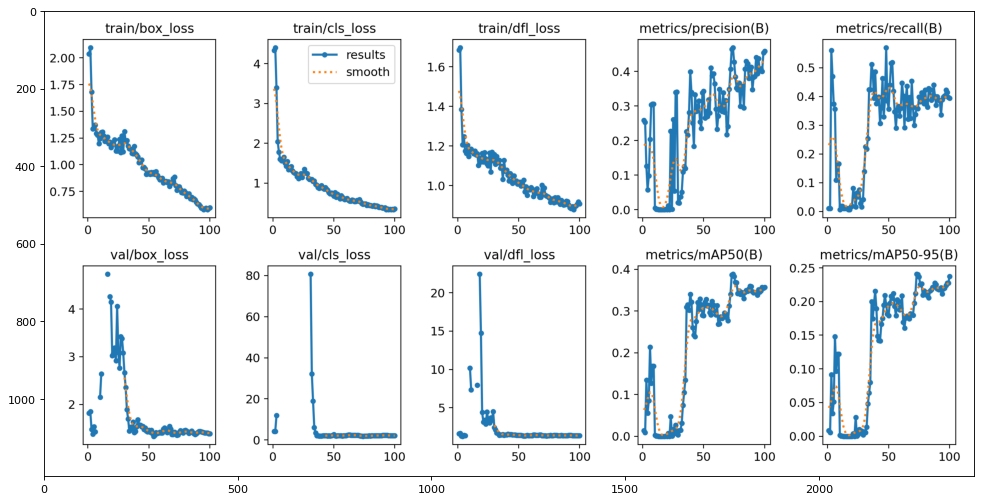

In [15]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread('runs/detect/train/results.png')   
# displaying the image 
plt.imshow(results) 

In [16]:
os.environ["WANDB_DISABLED"] = "False"

results = model1.train(data= yml_path,augment=True,
                      epochs=100,
                      imgsz=512)

Ultralytics YOLOv8.2.9 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

wandb: Currently logged in as: debajyotimaity007 (challange). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels/train... 132 images, 0 backgrounds, 0 corrupt: 100%|██████████| 132/132 [00:00<00:00, 182.77it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels/val... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 166.11it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.69G      1.835      4.353      1.519         38        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         33        245      0.681      0.211      0.202       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.43G      1.499      2.159      1.264         39        512: 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         33        245      0.184      0.412      0.217      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.58G      1.416      1.729      1.202         46        512: 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         33        245      0.245      0.672       0.31      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.44G      1.415      1.673      1.257         31        512: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         33        245       0.24      0.396      0.213      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.56G      1.379       1.68      1.207         65        512: 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         33        245     0.0783      0.502      0.063     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       8.5G      1.367      1.623       1.22         55        512: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         33        245       0.23      0.623       0.27       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       8.5G      1.378      1.567      1.242         46        512: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         33        245      0.223      0.557      0.299      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.49G      1.387      1.637      1.243         23        512: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         33        245      0.226      0.311      0.106     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.51G      1.396      1.556      1.235         50        512: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         33        245      0.176      0.149     0.0475      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.52G      1.334      1.428      1.193         54        512: 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         33        245      0.177      0.328      0.118     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.57G      1.361      1.403      1.192         47        512: 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         33        245     0.0743      0.423     0.0635      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.57G      1.356      1.403      1.216         54        512: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         33        245     0.0226      0.382     0.0179     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.45G       1.38      1.418      1.246         32        512: 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         33        245      0.284      0.476      0.264      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.54G       1.35      1.447      1.216         61        512: 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         33        245      0.336      0.372      0.297      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.54G      1.311      1.289      1.179         42        512: 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         33        245      0.262      0.549      0.304      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.57G      1.311        1.3      1.185         32        512: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         33        245      0.242      0.574      0.325      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       8.5G      1.277      1.274      1.174         45        512: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         33        245      0.428       0.34      0.367      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.59G      1.256      1.256      1.155         63        512: 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         33        245      0.365      0.406      0.355      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.58G      1.268      1.219      1.148         56        512: 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         33        245      0.207      0.523      0.305      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.57G      1.248      1.231      1.138         79        512: 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         33        245      0.253      0.599      0.403      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.47G       1.24      1.201      1.126         52        512: 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         33        245      0.312      0.454       0.33       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.55G      1.209      1.203      1.163         26        512: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         33        245      0.366      0.516      0.378      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.52G      1.192      1.169      1.113         56        512: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         33        245      0.291      0.536       0.34      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.57G      1.166      1.135       1.13         48        512: 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         33        245      0.315      0.559      0.387      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.45G      1.208      1.178      1.145         41        512: 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         33        245       0.33      0.504      0.355      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.58G      1.159      1.112      1.098         57        512: 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         33        245      0.306      0.519      0.339      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.54G      1.196      1.126       1.13         48        512: 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         33        245      0.327      0.457      0.346      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.57G      1.152      1.091      1.112         77        512: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         33        245      0.251      0.483      0.286       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.45G      1.153      1.047      1.117         48        512: 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         33        245      0.332      0.394      0.322      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.57G      1.145      1.033      1.134         45        512: 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         33        245      0.272      0.465      0.345      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.61G      1.151      1.078      1.141         63        512: 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         33        245      0.279      0.403      0.325      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.56G      1.144      1.016      1.115         39        512: 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         33        245      0.363      0.393      0.357      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.47G      1.151      1.033      1.104         42        512: 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         33        245      0.275      0.514      0.336      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.57G      1.104     0.9653      1.103         56        512: 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         33        245      0.249      0.544       0.33      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.54G      1.081     0.9633      1.064         66        512: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         33        245      0.249      0.483      0.302      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.61G      1.068     0.9073      1.074         38        512: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         33        245      0.305      0.477      0.312      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.46G      1.077     0.8826      1.096         35        512: 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         33        245      0.342      0.432      0.342      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.57G      1.048     0.8368      1.077         40        512: 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         33        245      0.331      0.498      0.357      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.57G      1.074     0.8652      1.089         44        512: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         33        245      0.285       0.46      0.324      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.56G      1.048     0.8658      1.096         45        512: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         33        245      0.315      0.435      0.307      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.49G      1.067     0.8875      1.076         85        512: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         33        245      0.272      0.472      0.297      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.56G      1.045     0.8481      1.044         64        512: 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         33        245      0.279      0.509      0.315      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.58G      1.046     0.8528       1.09         20        512: 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         33        245       0.24      0.445      0.304      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.57G      1.004     0.7692      1.058         31        512: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         33        245      0.361       0.43      0.375      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.45G      1.016     0.7514      1.058         39        512: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         33        245      0.388      0.389      0.365      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.57G     0.9752     0.7426      1.022         22        512: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         33        245      0.302      0.478      0.324      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.58G      1.011     0.7824      1.053         39        512: 100%|██████████| 9/9 [00:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         33        245      0.321      0.447      0.336       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.57G     0.9773     0.7273      1.016         38        512: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         33        245      0.316      0.407      0.298      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.42G     0.9819     0.7136      1.047         43        512: 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         33        245      0.302      0.411       0.33      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.59G      1.028     0.7317      1.042         38        512: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         33        245      0.363      0.307      0.307      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.56G      1.003     0.7089      1.048         24        512: 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         33        245      0.408      0.397      0.348      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.58G     0.9331     0.6477      1.008         35        512: 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         33        245      0.433      0.411      0.345      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.46G     0.9827     0.6712      1.031         51        512: 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         33        245      0.316      0.529      0.369      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.62G      1.025      0.753      1.073         19        512: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         33        245      0.411      0.345      0.313      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.57G     0.9323     0.6446     0.9878         25        512: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         33        245        0.3      0.474      0.317      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.56G     0.9346     0.6516     0.9955        103        512: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         33        245      0.458      0.311      0.313      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.52G     0.9349     0.6592     0.9994         20        512: 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         33        245      0.378      0.351       0.33      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.56G     0.9127     0.6197      1.013         18        512: 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         33        245       0.34      0.408      0.345      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.58G     0.9214     0.6529      1.011         38        512: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         33        245       0.32      0.449      0.339      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.57G     0.8618     0.6087     0.9778         41        512: 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         33        245      0.279      0.481      0.347      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.47G     0.9137     0.6227      1.028         47        512: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         33        245      0.319      0.462      0.366      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.58G     0.8736     0.5683     0.9779         44        512: 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         33        245      0.366      0.428      0.355      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.57G     0.8373     0.5232     0.9676         48        512: 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         33        245      0.347       0.39      0.346      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.56G      0.851     0.5434     0.9731         67        512: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         33        245      0.309      0.437      0.338      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.46G     0.8706      0.527     0.9799         47        512: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         33        245      0.316      0.445      0.309      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.55G     0.8523     0.5353     0.9796         44        512: 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         33        245      0.288       0.44      0.293      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.54G     0.8386     0.5406     0.9847         80        512: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         33        245      0.284       0.46      0.308      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.58G     0.8339     0.5468      0.973         25        512: 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         33        245      0.417      0.357      0.326      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.46G     0.8176     0.5279     0.9754         48        512: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         33        245      0.348      0.403      0.309      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.57G     0.7987     0.5245     0.9765         44        512: 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         33        245      0.317      0.424      0.295      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.57G     0.7835     0.4979     0.9499         57        512: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         33        245      0.278      0.426      0.287      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.59G      0.778     0.4846     0.9679         27        512: 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         33        245      0.371      0.376      0.311      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.43G     0.7993     0.4929     0.9652         25        512: 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         33        245      0.329      0.411       0.32      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.55G     0.8037     0.4937     0.9729         29        512: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         33        245      0.317      0.439      0.312      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.55G     0.8015      0.479      0.953         78        512: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         33        245      0.357       0.39      0.306      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.58G     0.7561     0.4761     0.9397         49        512: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         33        245      0.346      0.488      0.319      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.46G     0.7696     0.4876      0.953         54        512: 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         33        245       0.34       0.44       0.32      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.59G     0.7495     0.4508     0.9439         37        512: 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         33        245      0.346       0.45      0.323      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       8.6G     0.7275     0.4389     0.9348         29        512: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         33        245      0.335      0.457      0.338      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.54G     0.7604     0.4476     0.9494         71        512: 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         33        245       0.33      0.452      0.333      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.44G     0.7617     0.4617     0.9571         46        512: 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         33        245      0.348      0.426      0.336      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.53G     0.7296     0.4389     0.9329         59        512: 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         33        245      0.324      0.385      0.325      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.57G     0.7806     0.5132     0.9362         70        512: 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         33        245       0.37      0.366      0.329      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.55G     0.7511     0.4432     0.9287         56        512: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         33        245      0.317      0.441      0.319      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.46G     0.7168     0.4234     0.9427         41        512: 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         33        245      0.408      0.364       0.32      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.57G     0.7242     0.4236     0.9337         25        512: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         33        245      0.367      0.393      0.331      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.57G     0.7018     0.4334     0.9313         43        512: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         33        245      0.304      0.424      0.331      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.57G     0.6906      0.413     0.9243         48        512: 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         33        245      0.322      0.422      0.339      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.46G     0.6636     0.3972     0.9064         64        512: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         33        245      0.379      0.396      0.343      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.57G     0.6645     0.3865     0.9123         50        512: 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         33        245      0.315      0.434       0.33      0.211


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.54G      0.646     0.3822     0.9213         25        512: 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         33        245      0.315       0.43      0.317      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.53G     0.6788     0.3975     0.9221         30        512: 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         33        245      0.322      0.387      0.293      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.42G      0.631     0.3635     0.9239         36        512: 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         33        245      0.311      0.363      0.288      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.53G     0.6581     0.3757     0.9184         23        512: 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         33        245      0.336      0.381      0.299      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.54G     0.5947      0.335     0.8976         43        512: 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         33        245      0.338      0.403      0.307      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.54G     0.6326     0.3465     0.9351         17        512: 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         33        245      0.321      0.433      0.319      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.43G     0.6273     0.3898     0.9469         27        512: 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         33        245      0.324      0.454       0.32      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.54G     0.6056     0.3541     0.9209         37        512: 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         33        245       0.33      0.454       0.32      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.54G     0.5928     0.3391     0.9028         36        512: 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         33        245      0.321      0.452      0.323      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.55G     0.5823     0.3426     0.9052         20        512: 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         33        245      0.326      0.446      0.328      0.208



100 epochs completed in 0.213 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.9 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25322332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.84s/it]


                   all         33        245      0.309      0.517        0.4       0.25
damagedresidentialbuilding         33         37       0.22      0.432       0.26      0.156
undamagedresidentialbuilding         33        104      0.321       0.76      0.525      0.307
undamagedcommercialbuilding         33         79      0.453      0.754      0.606      0.408
damagedcommercialbuilding         33         25      0.243       0.12       0.21      0.129
Speed: 0.1ms preprocess, 166.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train2


lr/pg0,▁▃▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▁▃▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▁▃▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▄▆▅▂▁▅▆▇▇▇▇▆▆▇▆▆▆▇▆▇▇▆▆▇▇▇▆▆▆▆▆▇▆▆▇▇▆▆▆█
metrics/mAP50-95(B),▃▆▅▂▁▅▆▇▆▆▆▅▆▆▆▆▅▇▆▆▇▆▆▇▇▇▆▆▆▆▆▇▆▆▇▇▆▆▆█
metrics/precision(B),█▃▃▃▁▃▃▄▄▄▄▃▃▃▄▃▃▄▄▄▅▅▅▄▄▄▃▄▄▄▄▄▄▄▄▅▄▄▄▄
metrics/recall(B),▁█▇▃▄▅▇▄▅▆▆▅▄▆▅▅▅▄▅▄▄▃▃▅▅▄▅▄▄▄▄▅▄▄▄▄▄▄▅▆
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁


In [17]:
os.environ["WANDB_DISABLED"] = "False"

results = model.train(data= yml_path,augment=True,
                      epochs=100,
                      imgsz=512)

Ultralytics YOLOv8.2.9 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=/kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

Freezing layer 'model.42.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels/train... 132 images, 0 backgrounds, 0 corrupt: 100%|██████████| 132/132 [00:00<00:00, 549.80it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels/val... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 391.16it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset-yaml3/Annotation_rectangle/YOLODataset/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      15.2G      1.857      4.401      1.593         38        512: 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         33        245      0.385      0.265      0.148     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.98G       1.46       2.18      1.267         39        512: 100%|██████████| 9/9 [00:09<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         33        245     0.0536      0.441     0.0471     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      15.3G      1.361      1.713       1.22         46        512: 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245    0.00423     0.0024    0.00186   0.000372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      15.1G      1.403      1.681      1.278         31        512: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245    0.00423     0.0024    0.00186   0.000372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      15.3G      1.422        1.6      1.217         65        512: 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         33        245    0.00423     0.0024    0.00186   0.000372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      15.1G      1.429      1.592      1.243         55        512: 100%|██████████| 9/9 [00:09<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         33        245   0.000428    0.00481   0.000222   7.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      15.1G      1.376      1.532      1.254         46        512: 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         33        245     0.0199      0.619     0.0179     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      15.1G      1.411      1.728      1.273         23        512: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         33        245    0.00342      0.157    0.00281    0.00129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        15G      1.377      1.688      1.246         50        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245    0.00302     0.0211    0.00145   0.000658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      15.1G      1.483      1.519      1.261         54        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245     0.0161      0.185    0.00977    0.00559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      15.3G      1.435      1.517      1.243         47        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245     0.0373      0.173     0.0179     0.0087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      15.3G      1.354      1.481      1.224         54        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         33        245   0.000164    0.00481    8.6e-05   1.27e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100        15G      1.356      1.495      1.238         32        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         33        245   0.000341     0.0104   0.000176   5.31e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      15.3G      1.351      1.529       1.22         61        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         33        245   0.000147    0.00481   7.53e-05   3.01e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      15.3G      1.316      1.344      1.192         42        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         33        245     0.0184     0.0502     0.0113    0.00464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      15.3G      1.338      1.353      1.214         32        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         33        245       0.11       0.33      0.112      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100        15G      1.346      1.411      1.216         45        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.175        0.4      0.154      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      15.3G      1.309      1.378      1.189         63        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.141      0.461      0.132     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      15.3G      1.285      1.337       1.16         56        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         33        245      0.176      0.507      0.217      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      15.3G      1.286      1.345      1.162         79        512: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         33        245      0.239      0.421      0.196      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        15G      1.281      1.346      1.148         52        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.213      0.494      0.194      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      15.1G      1.282      1.374      1.192         26        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.177      0.364      0.137     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      15.3G      1.256      1.372      1.151         56        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.134      0.396     0.0881     0.0477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      15.3G      1.225      1.311      1.162         48        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245        0.1      0.119     0.0392     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        15G       1.27      1.307      1.176         41        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.235      0.248      0.178      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      15.3G      1.229      1.255      1.129         57        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.213      0.419      0.274      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      15.1G      1.285      1.311      1.182         48        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245       0.27      0.351      0.251       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      15.3G      1.241       1.26      1.158         77        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.242      0.399      0.236      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        15G      1.283      1.195      1.192         48        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.324       0.45      0.345      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      15.3G      1.241      1.197      1.192         45        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         33        245      0.275      0.528      0.337      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      15.3G      1.176      1.229      1.153         63        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         33        245      0.206      0.522      0.268       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      15.3G      1.191       1.19      1.147         39        512: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         33        245      0.309      0.452      0.344      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100        15G        1.2       1.22       1.13         42        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245       0.16      0.451      0.197      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      15.3G      1.151      1.156      1.131         56        512: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.344      0.563      0.354      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      15.3G      1.132      1.133      1.098         66        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.363      0.491        0.4      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      15.3G      1.157      1.127      1.118         38        512: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         33        245       0.39      0.451      0.384      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        15G       1.14      1.132      1.132         35        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.366      0.564      0.391       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      15.3G      1.101      1.035      1.113         40        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         33        245      0.332      0.551       0.37      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      15.3G      1.098      1.028      1.098         44        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.346      0.439      0.338      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      15.3G      1.108      1.069      1.131         45        512: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.355      0.486      0.364      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100        15G      1.153      1.076      1.123         85        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.323      0.487      0.354       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      15.3G       1.13       1.07      1.089         64        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         33        245      0.333      0.565       0.38      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      15.1G      1.114      1.067      1.128         20        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         33        245      0.316      0.464      0.338      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      15.3G      1.089     0.9826      1.096         31        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.369      0.454      0.407      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        15G      1.084      1.015      1.091         39        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.341      0.531      0.409      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      15.3G      1.039      1.003      1.064         22        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         33        245      0.292      0.461      0.338      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      15.3G      1.075      1.023      1.084         39        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.342      0.465      0.388      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      15.3G      1.034     0.9598      1.048         38        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.362      0.533      0.394      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100        15G      1.046     0.9276      1.081         43        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.377      0.449      0.378      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      15.3G      1.099     0.9492      1.077         38        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         33        245      0.322      0.504      0.363      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      15.3G      1.067     0.8881      1.083         24        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.367      0.487      0.403      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      15.3G     0.9872     0.8547      1.038         35        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         33        245       0.31      0.548       0.38       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100        15G       1.04     0.8607      1.059         51        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245        0.4      0.441      0.404      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      15.1G      1.084     0.9187      1.112         19        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.311      0.539      0.386      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      15.3G     0.9791     0.8194      1.022         25        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.379      0.496      0.377      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      15.3G     0.9727     0.7954      1.012        103        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.354      0.515       0.38      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100        15G      0.981     0.7831      1.027         20        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.348      0.519      0.397       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      15.3G     0.9574     0.7815      1.033         18        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.366      0.483      0.384      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      15.3G     0.9538      0.755      1.029         38        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.377      0.483      0.404      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      15.3G     0.9195      0.736      1.007         41        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.393        0.5      0.405      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100        15G     0.9297     0.7204      1.046         47        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.358      0.477      0.386      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      15.3G     0.9242     0.7033      1.005         44        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.408      0.386      0.347      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      15.1G     0.9143     0.6605      1.004         48        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.309      0.573      0.373       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      15.3G     0.9084     0.7118      1.003         67        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245       0.35      0.488       0.37       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100        15G     0.9231     0.6658      1.018         47        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.371       0.48      0.376      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      15.3G     0.9152     0.6984       1.01         44        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.395       0.39      0.361      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      15.3G     0.9089     0.6841      1.016         80        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245       0.45      0.383      0.389       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      15.3G     0.9048     0.7004      1.009         25        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         33        245       0.35      0.455      0.375      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100        15G     0.9321     0.7206      1.024         48        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.409      0.401      0.379      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      15.3G     0.8971     0.6668      1.016         44        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245        0.4      0.357      0.355      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      15.3G     0.8532     0.6463     0.9838         57        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         33        245      0.308      0.533      0.367      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      15.3G      0.869     0.5994      1.006         27        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         33        245      0.357      0.434      0.371      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100        15G     0.8523     0.6183     0.9992         25        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.339       0.41      0.368      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      15.3G     0.8564     0.5834      1.005         29        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.339      0.428      0.364      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      15.3G     0.8601     0.5852     0.9836         78        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.319      0.498      0.353      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      15.3G     0.8431      0.552     0.9761         49        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.352      0.481      0.374      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      15.1G     0.8431     0.5675     0.9907         54        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245       0.37      0.462      0.374      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      15.3G     0.8292     0.5496     0.9775         37        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245      0.361      0.473      0.366      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      15.3G      0.805     0.5273     0.9678         29        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.523      0.353      0.375      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      15.3G     0.8089     0.5345     0.9756         71        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.424      0.414      0.393       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100        15G     0.8033     0.5163     0.9816         46        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.329      0.487      0.382      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      15.1G     0.7744     0.4958     0.9573         59        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.321      0.442      0.383       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      15.3G     0.8431     0.5608     0.9643         70        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245       0.33      0.477      0.384      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      15.3G     0.8156     0.5056      0.961         56        512: 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.459      0.349       0.37      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100        15G     0.7834     0.4913     0.9764         41        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245       0.44      0.371      0.372      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      15.3G     0.7865     0.4854     0.9597         25        512: 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.354      0.455      0.384      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      15.3G     0.7587     0.5265     0.9613         43        512: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.426      0.427      0.391      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      15.3G     0.7539     0.4651     0.9608         48        512: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         33        245       0.39       0.42      0.387      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100        15G     0.7277     0.4557     0.9329         64        512: 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         33        245       0.34      0.496      0.375       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      15.1G     0.7191     0.4698     0.9359         50        512: 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.329      0.494      0.374      0.229


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      15.3G     0.7071     0.4499     0.9518         25        512: 100%|██████████| 9/9 [00:10<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         33        245      0.314        0.5      0.374      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      15.3G     0.7211     0.4393     0.9454         30        512: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         33        245      0.327      0.449       0.37       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        15G     0.6965     0.4237     0.9546         36        512: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.332      0.475       0.37      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      15.3G     0.6905     0.4081     0.9379         23        512: 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         33        245      0.327      0.504      0.376      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      15.3G     0.6372     0.3797     0.9229         43        512: 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245       0.32      0.531      0.382      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      15.3G     0.6942     0.4162     0.9631         17        512: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         33        245      0.367      0.498       0.39      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      15.1G     0.6838     0.4255     0.9687         27        512: 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         33        245      0.397      0.461      0.395      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      15.3G     0.6691     0.3944     0.9446         37        512: 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         33        245      0.375      0.463      0.394      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      15.3G     0.6479     0.3599     0.9304         36        512: 100%|██████████| 9/9 [00:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         33        245      0.399      0.422      0.391      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      15.1G     0.6515      0.383     0.9318         20        512: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         33        245      0.386      0.434      0.387      0.233



100 epochs completed in 0.406 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 117.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.9 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9e summary (fused): 687 layers, 57379484 parameters, 0 gradients, 189.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.62s/it]


                   all         33        245      0.362      0.545        0.4      0.252
damagedresidentialbuilding         33         37      0.275      0.432      0.277      0.165
undamagedresidentialbuilding         33        104      0.475      0.615      0.508      0.292
undamagedcommercialbuilding         33         79        0.5      0.734      0.617      0.427
damagedcommercialbuilding         33         25      0.197        0.4      0.197      0.124
Speed: 0.1ms preprocess, 153.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train3


lr/pg0,▁▃▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▁▃▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▁▃▅▆████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▄▁▁▁▁▁▃▃▄▃▆▅▆▇█▇▇█▇▇█████▇██▇▇▇▇█▇█▇▇▇██
metrics/mAP50-95(B),▃▁▁▁▁▁▃▃▄▂▅▅▅▇▇▇▆█▆▇▇█▇██▇▇▇▇▇▇▇▇▇▇▇▇███
metrics/precision(B),▆▁▁▁▁▁▂▃▄▃▄▄▄▆▆▆▅▆▅▆▆▅▆▆▆▆▇▆▆▆▆█▅▇▇▆▅▅▆▆
metrics/recall(B),▄▁▁▃▃▁▅▇▇▆▆▆▇█▇▆▇▇▇▇▇█▇▇▇▇▆▆▆▆▇▅▆▅▆▇▇▇▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▅▆▅▆▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▄▃▃▃▂▂▃▂▂▂▂▂▂▂▁▁▁▁▁


In [18]:
!ls runs/detect/train3

F1_curve.png					  train_batch0.jpg
PR_curve.png					  train_batch1.jpg
P_curve.png					  train_batch2.jpg
R_curve.png					  train_batch810.jpg
args.yaml					  train_batch811.jpg
confusion_matrix.png				  train_batch812.jpg
confusion_matrix_normalized.png			  val_batch0_labels.jpg
events.out.tfevents.1714925290.c921e64b9254.34.2  val_batch0_pred.jpg
labels.jpg					  val_batch1_labels.jpg
labels_correlogram.jpg				  val_batch1_pred.jpg
results.csv					  weights
results.png


In [19]:
!ls runs/detect/train2

F1_curve.png					  train_batch0.jpg
PR_curve.png					  train_batch1.jpg
P_curve.png					  train_batch2.jpg
R_curve.png					  train_batch810.jpg
args.yaml					  train_batch811.jpg
confusion_matrix.png				  train_batch812.jpg
confusion_matrix_normalized.png			  val_batch0_labels.jpg
events.out.tfevents.1714923298.c921e64b9254.34.1  val_batch0_pred.jpg
labels.jpg					  val_batch1_labels.jpg
labels_correlogram.jpg				  val_batch1_pred.jpg
results.csv					  weights
results.png


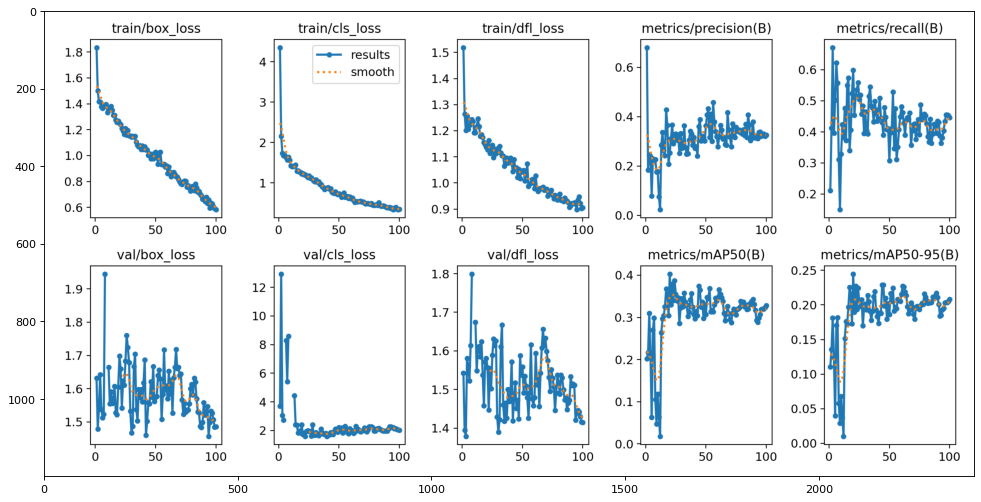

In [20]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread('runs/detect/train2/results.png')   
# displaying the image 
plt.imshow(results) 

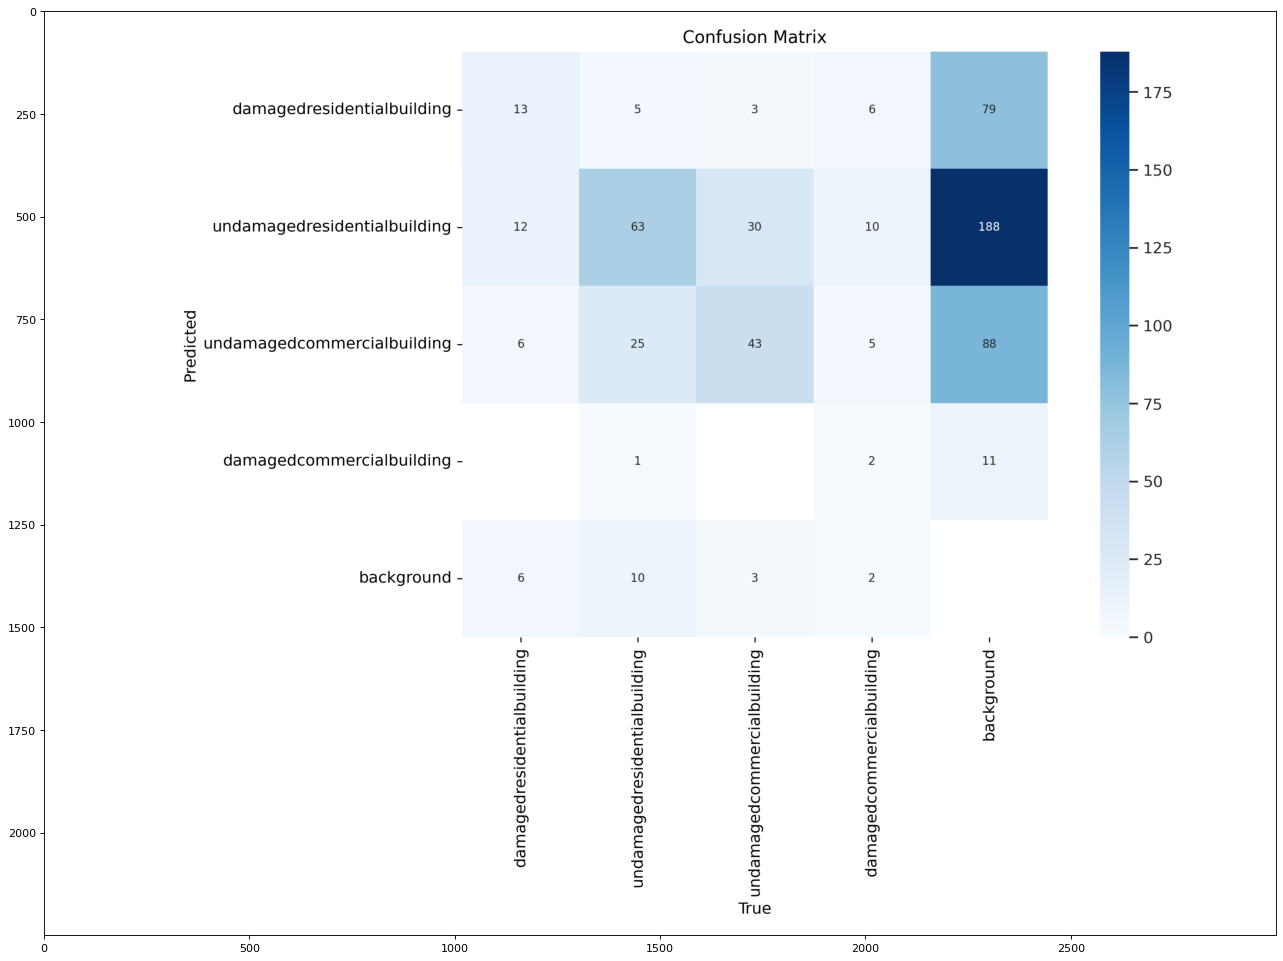

In [21]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread('runs/detect/train2/confusion_matrix.png') 
# displaying the image 
plt.imshow(cf) 

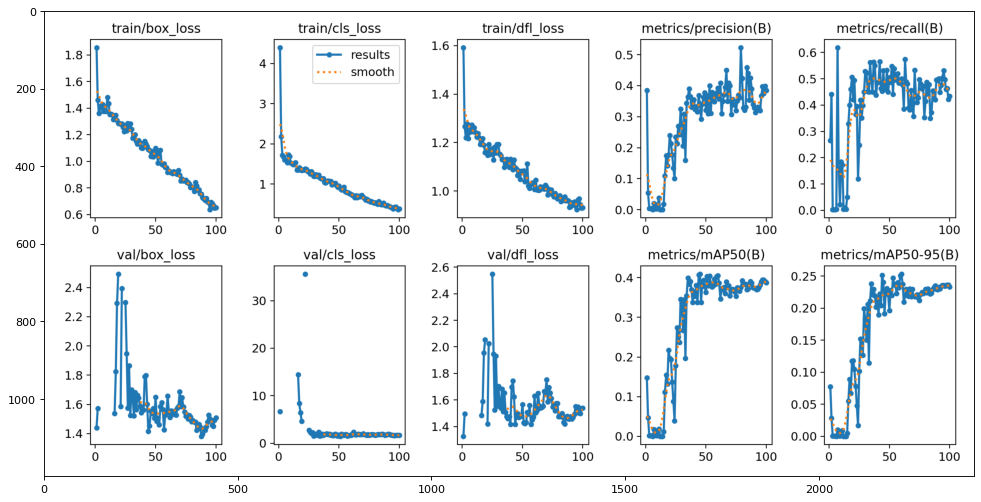

In [22]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread('runs/detect/train3/results.png')   
# displaying the image 
plt.imshow(results) 

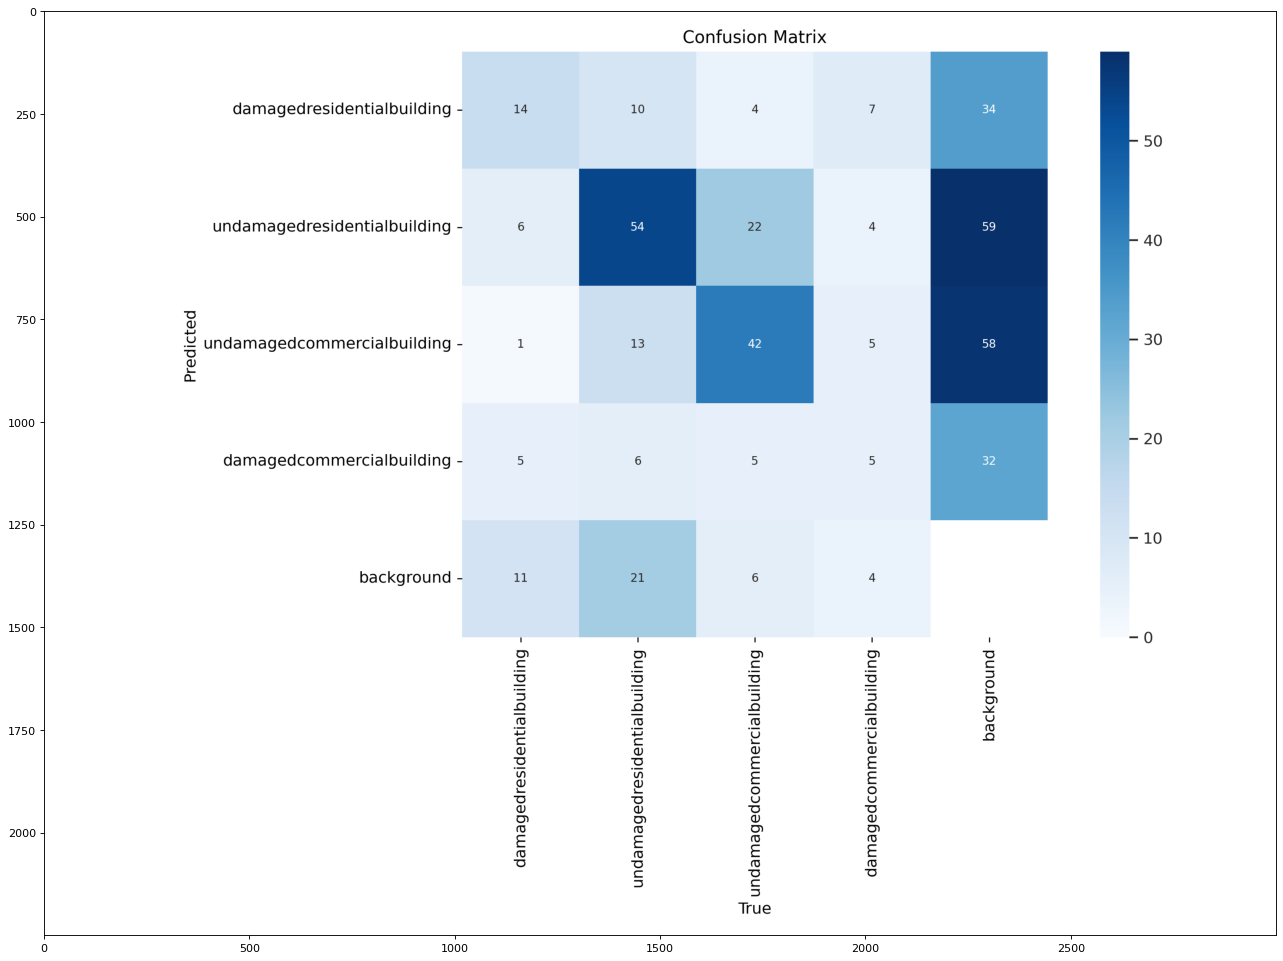

In [23]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread('runs/detect/train3/confusion_matrix.png') 
# displaying the image 
plt.imshow(cf) 